In [13]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [14]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [15]:
from cStringIO import StringIO
import glob
from IPython.display import display, Image
import imageio
import numpy as np
import os
import PIL.Image
from round_embeddings import get_color_img

In [19]:
#results_dir = '/zfsauton/project/public/deep_clustering/exp/cityscapes/train_on_train_set/emb/matt/001_instance_norm_batch2_lr1e-3_Apr17-14:07:22_VCS-bc609d9_gpu2/raw_segmentation_results/roundings'
results_dir = '/zfsauton/project/public/deep_clustering/exp/cityscapes/train_on_train_set/round/matt/001_instance_norm_block_batch2_lr1e-3_Apr18-15:20:55_VCS-4ee98d8_gpu3_google'
gt_dir = '/zfsauton/project/public/deep_clustering/data/datasets/cityscapes/gtFine/val'
max_images = 2
IMG_END = '_pred_instances.png'
WIDTH = 800

In [20]:
def get_img_from_array(a, fmt='png', width=None):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    return Image(data=f.getvalue(), width=width)

Found 500 predictions
munster_000105_000019
ground truth, predictions


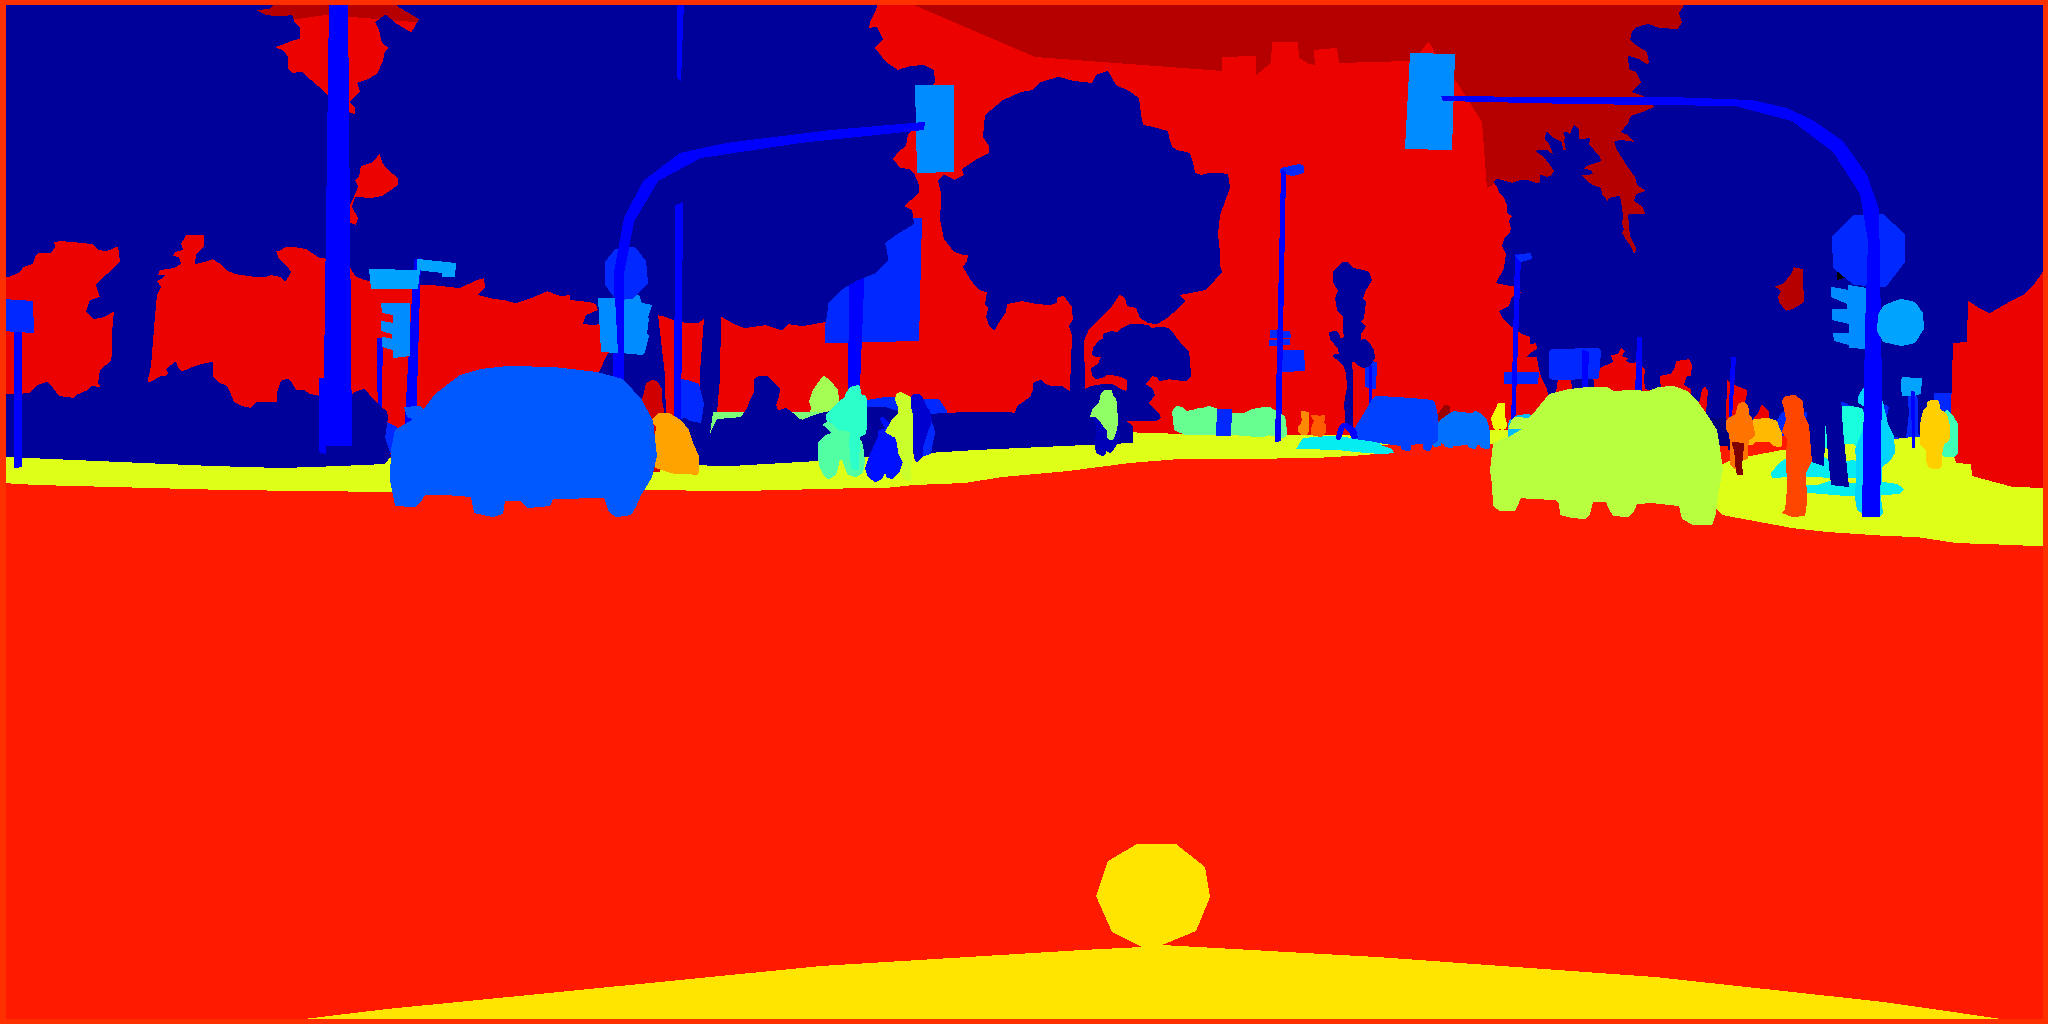

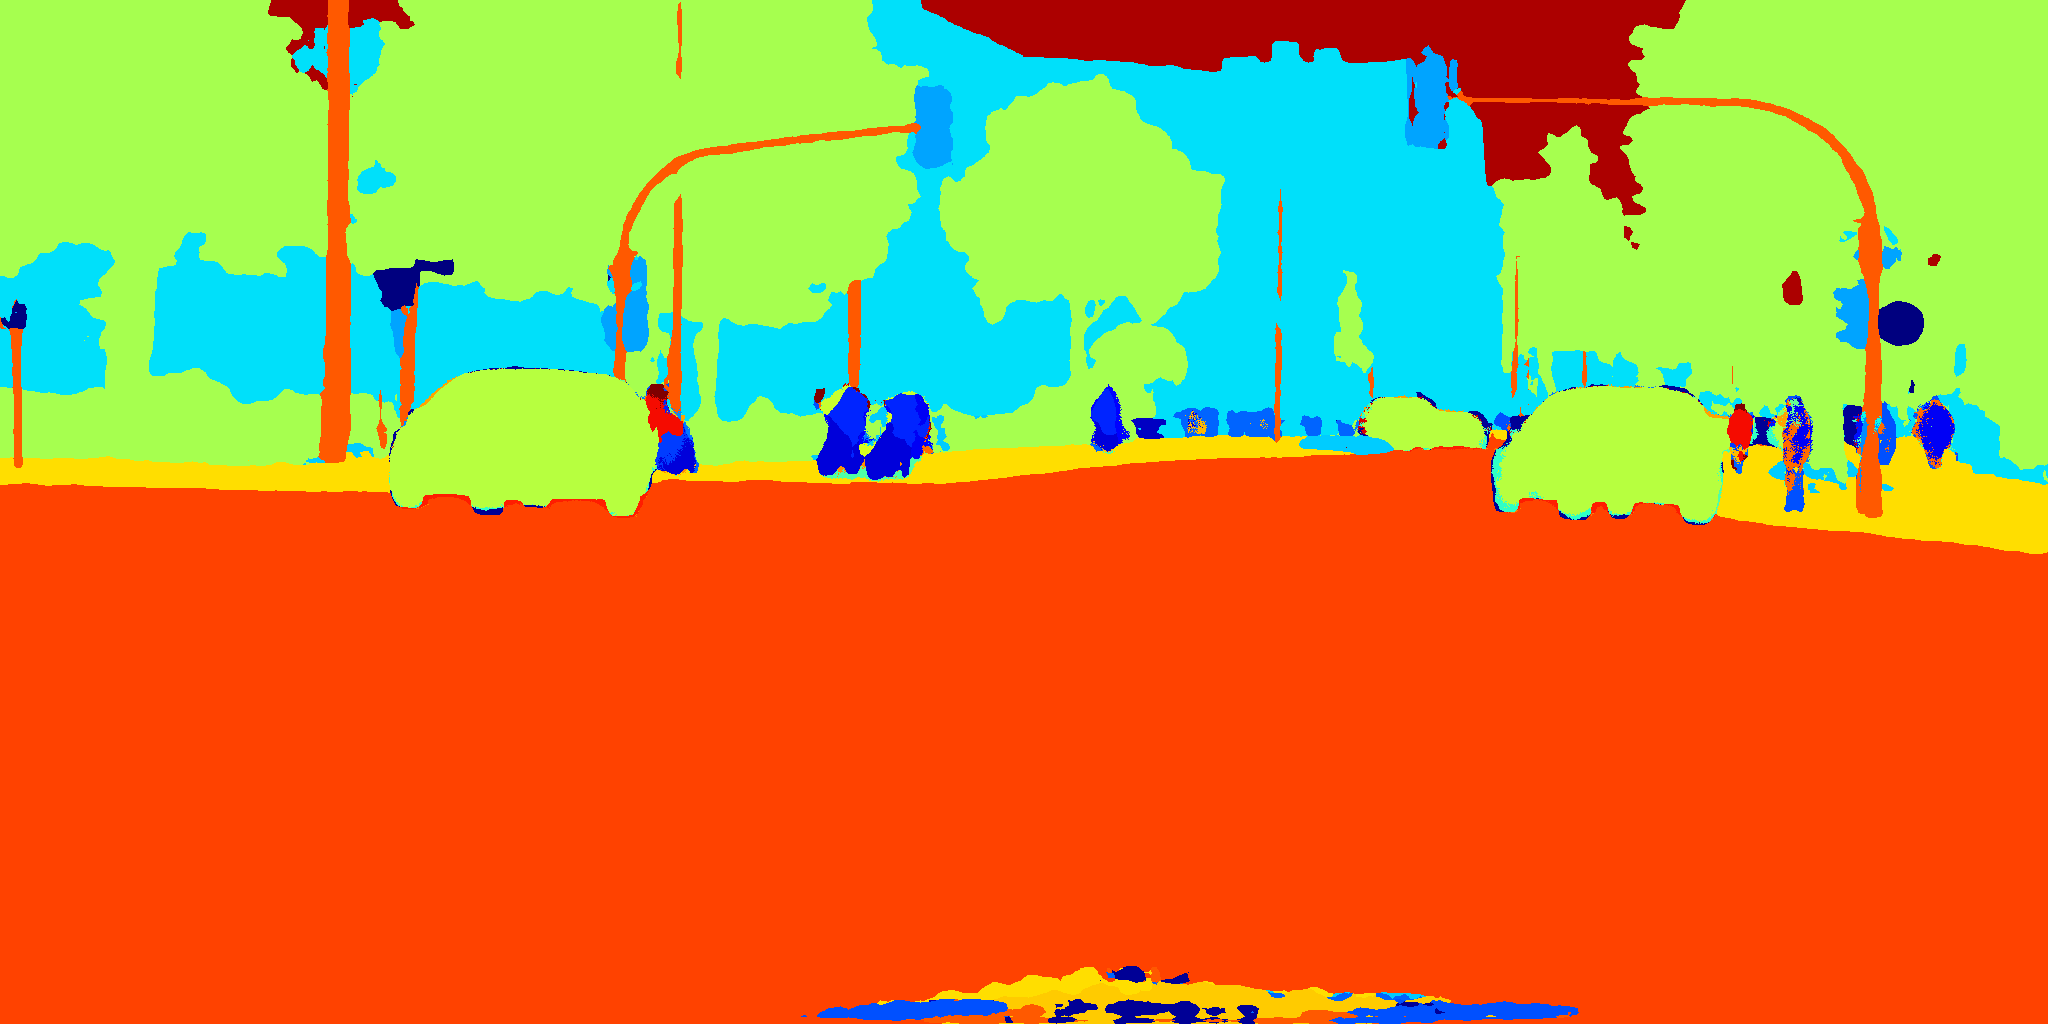

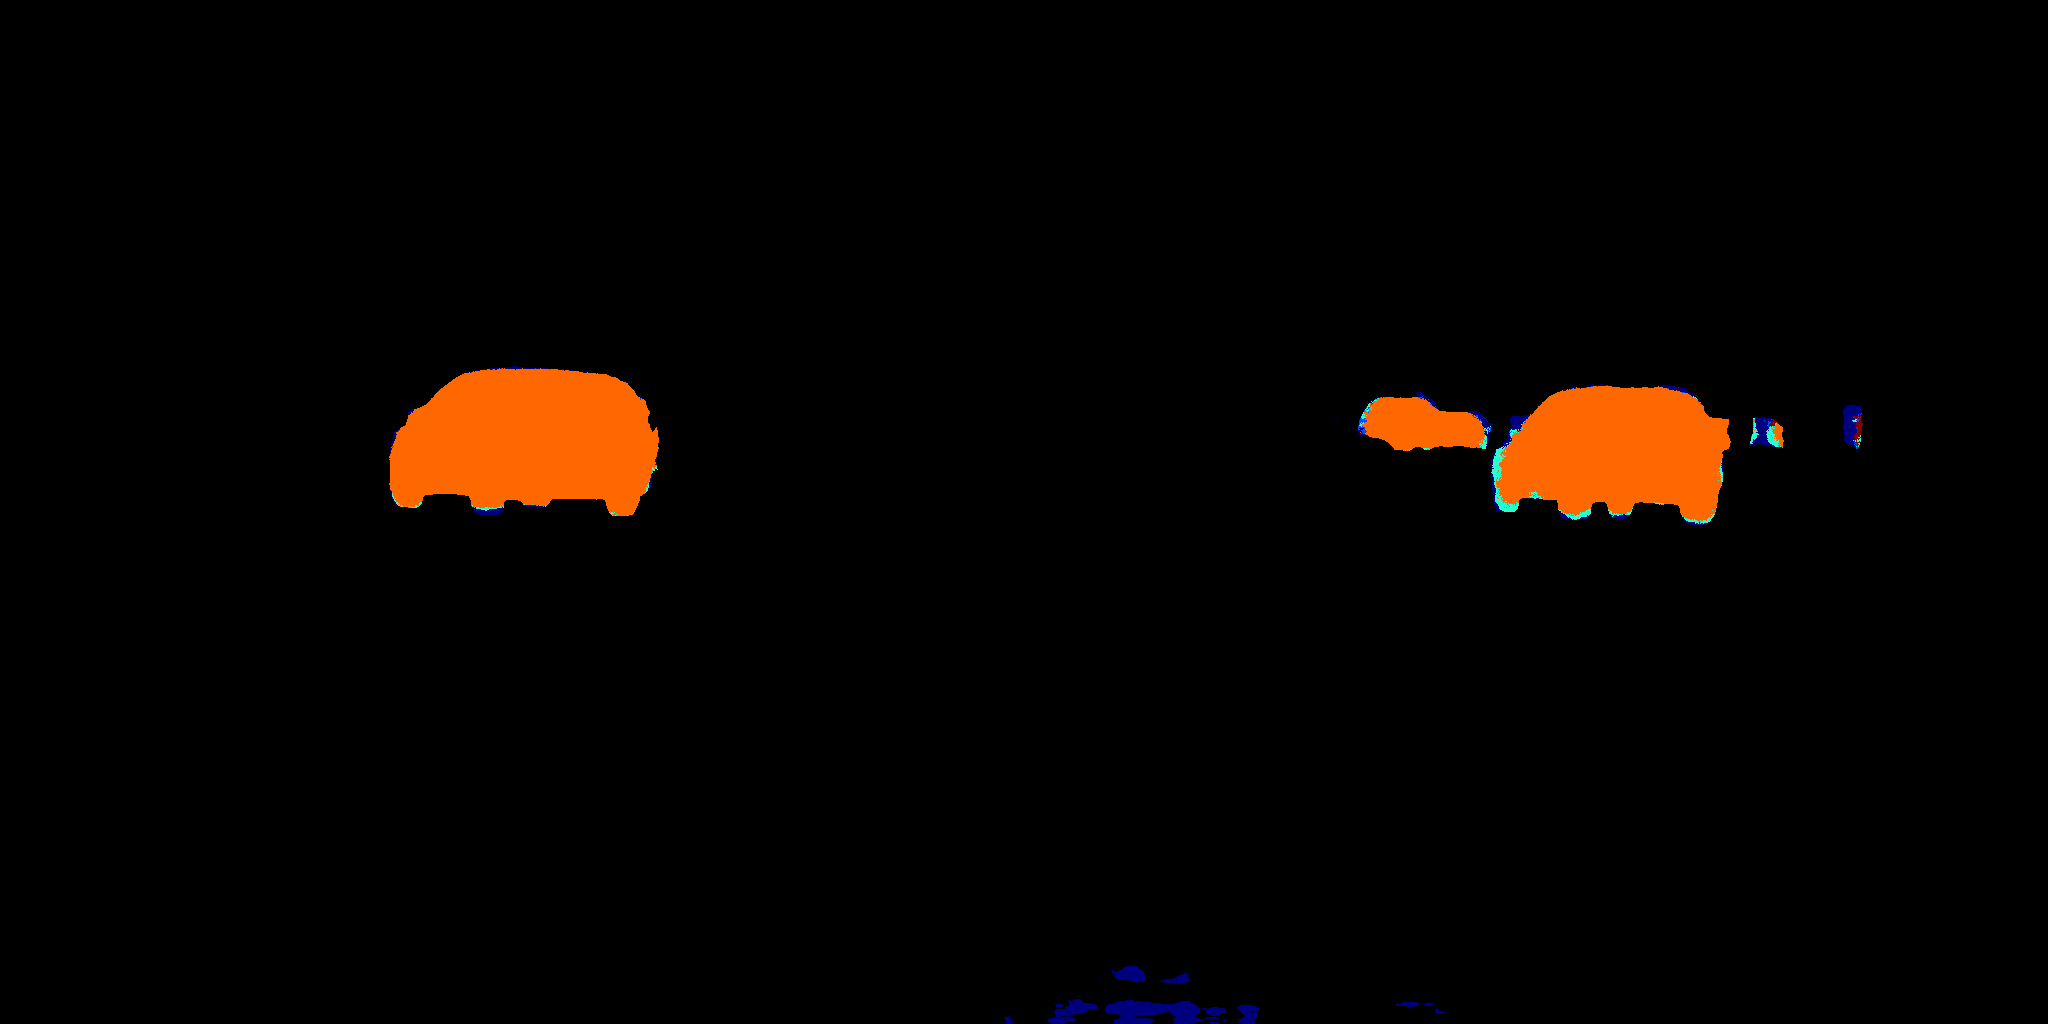

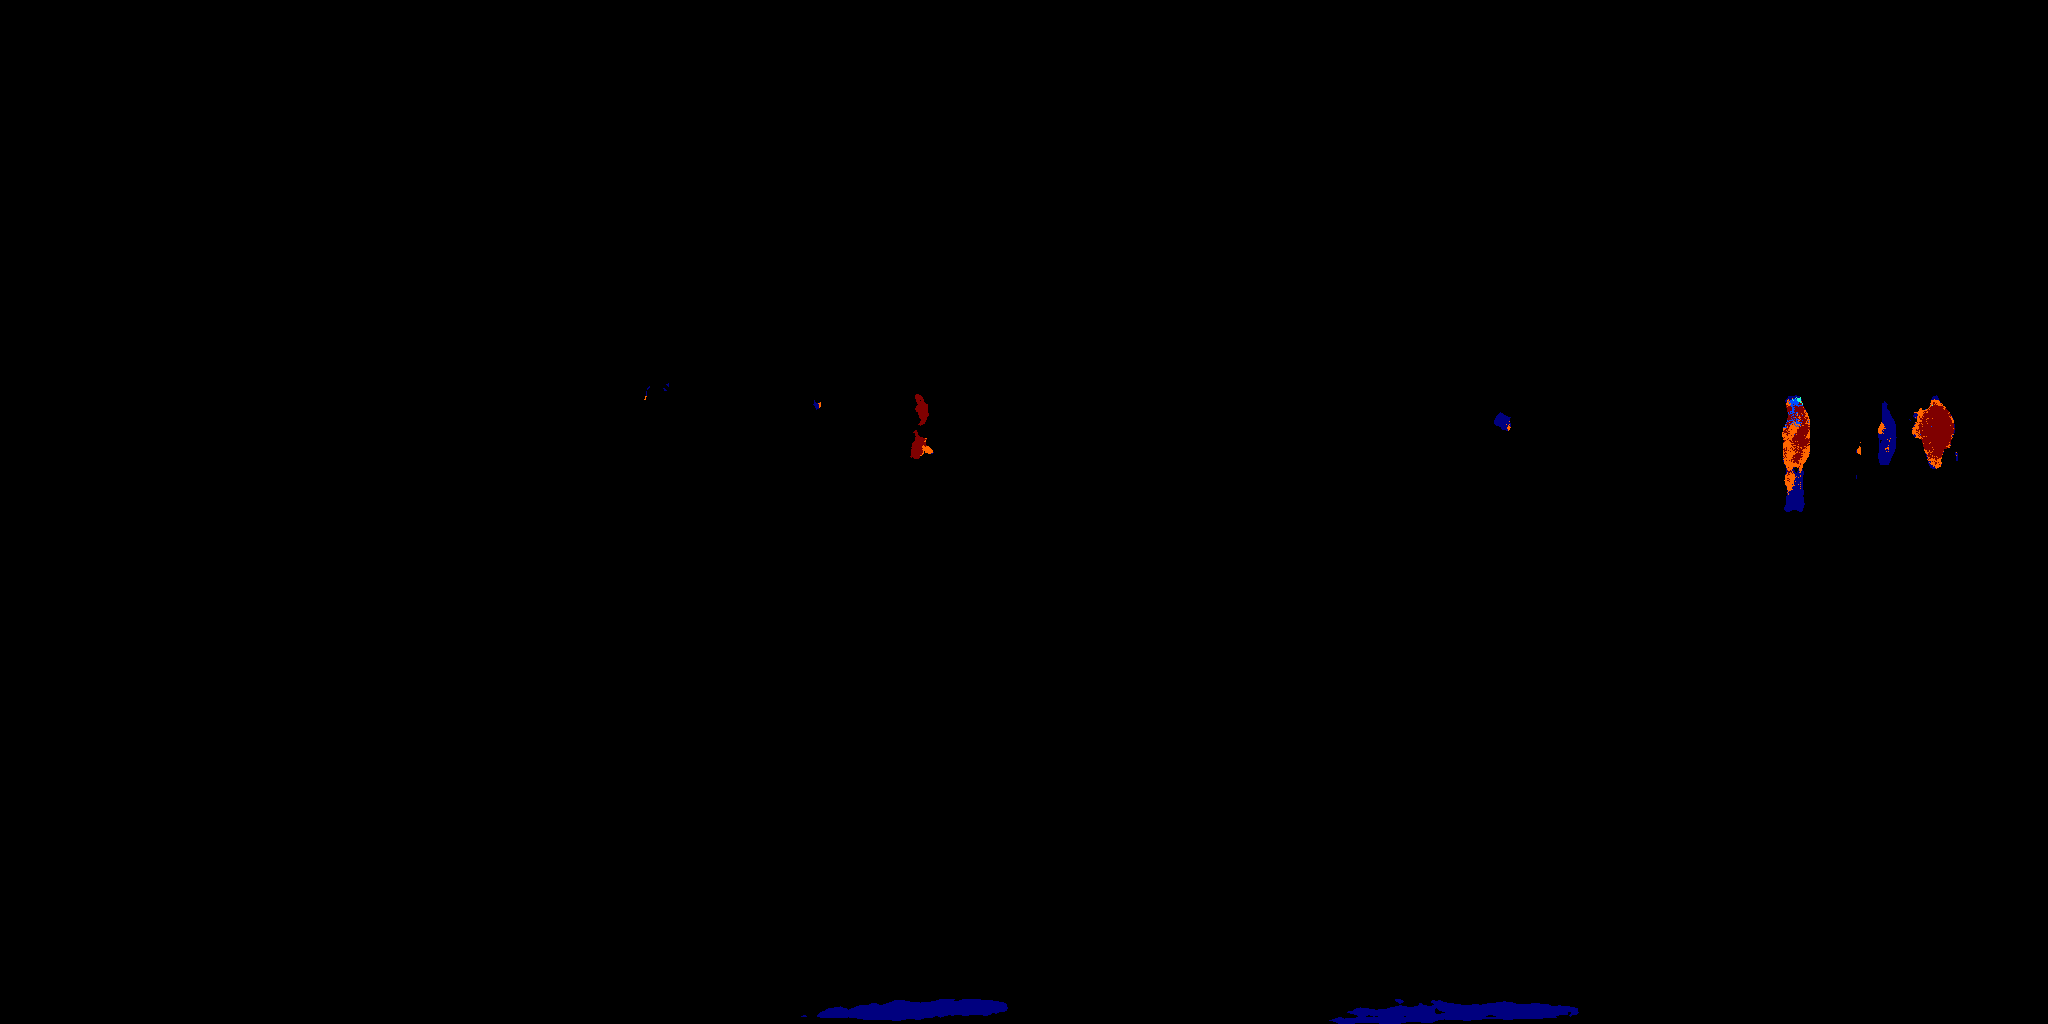

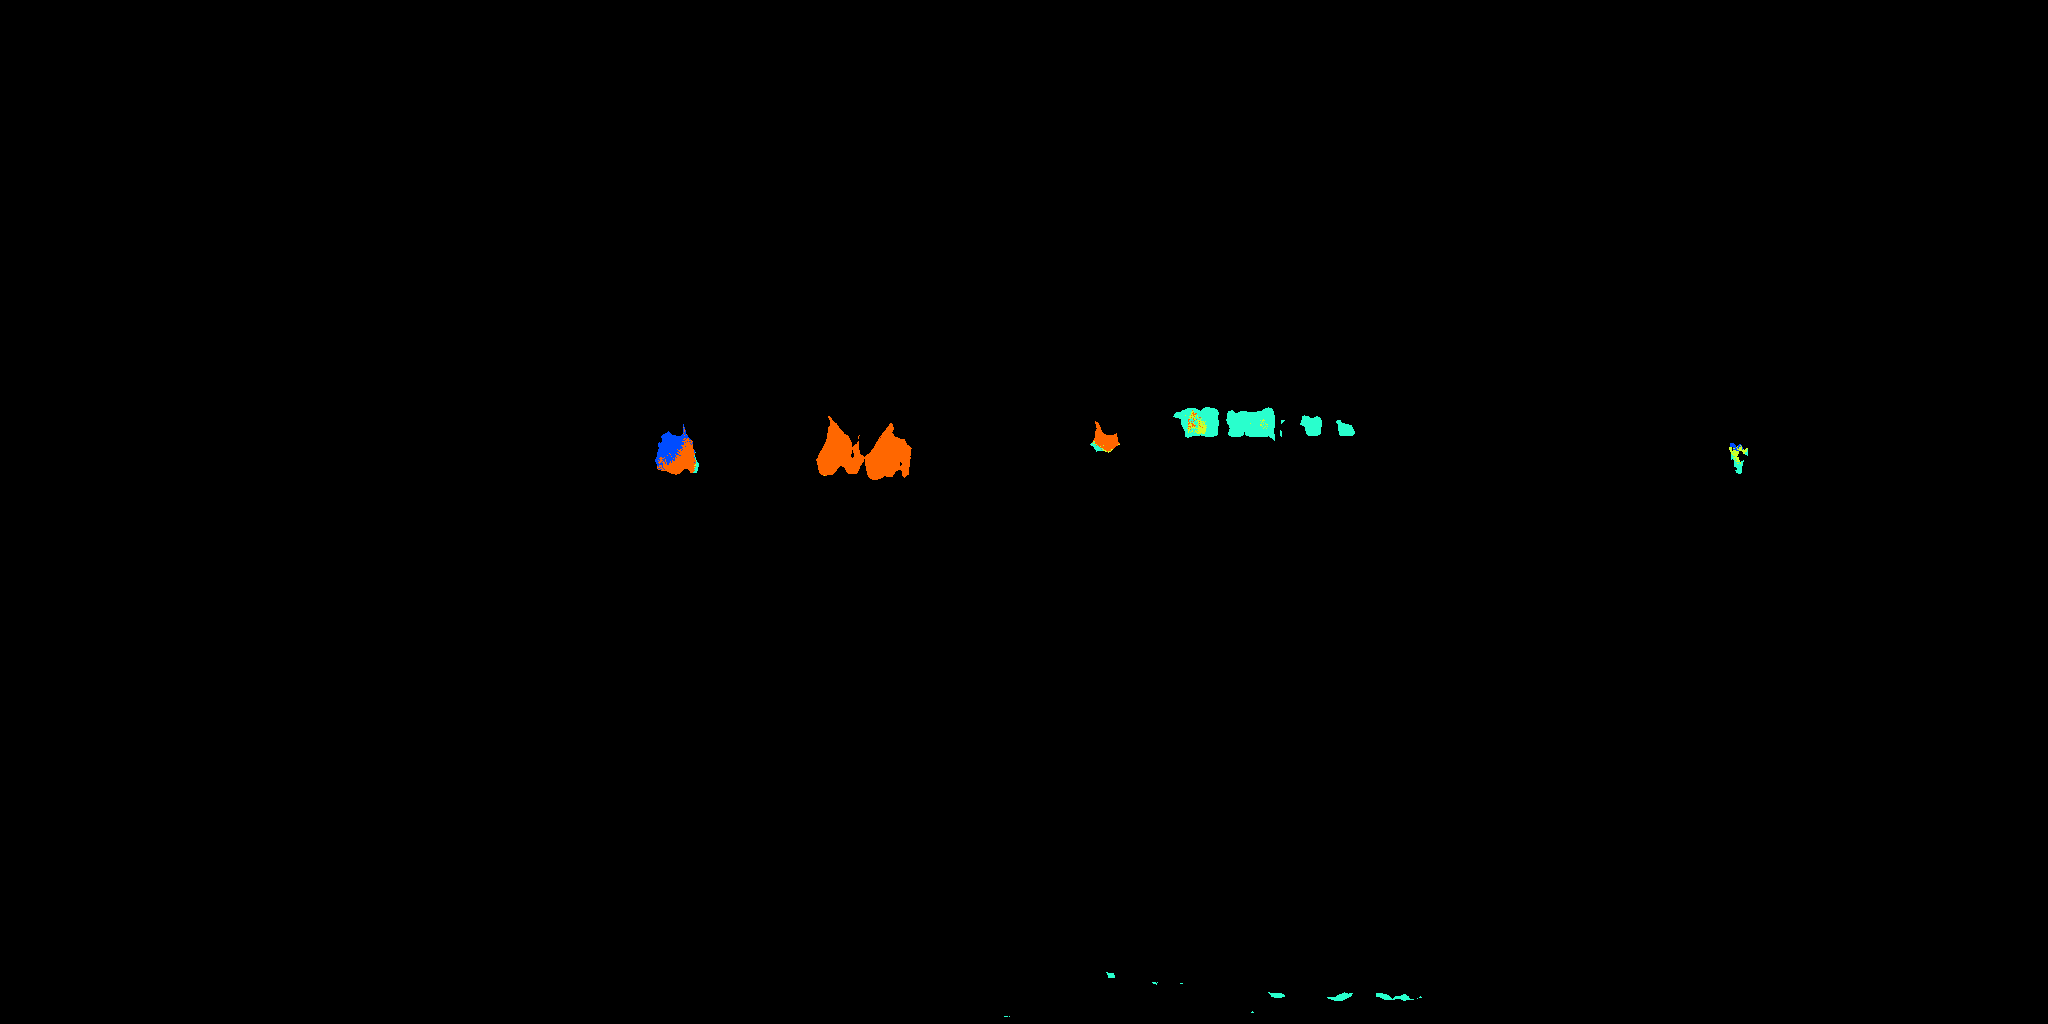

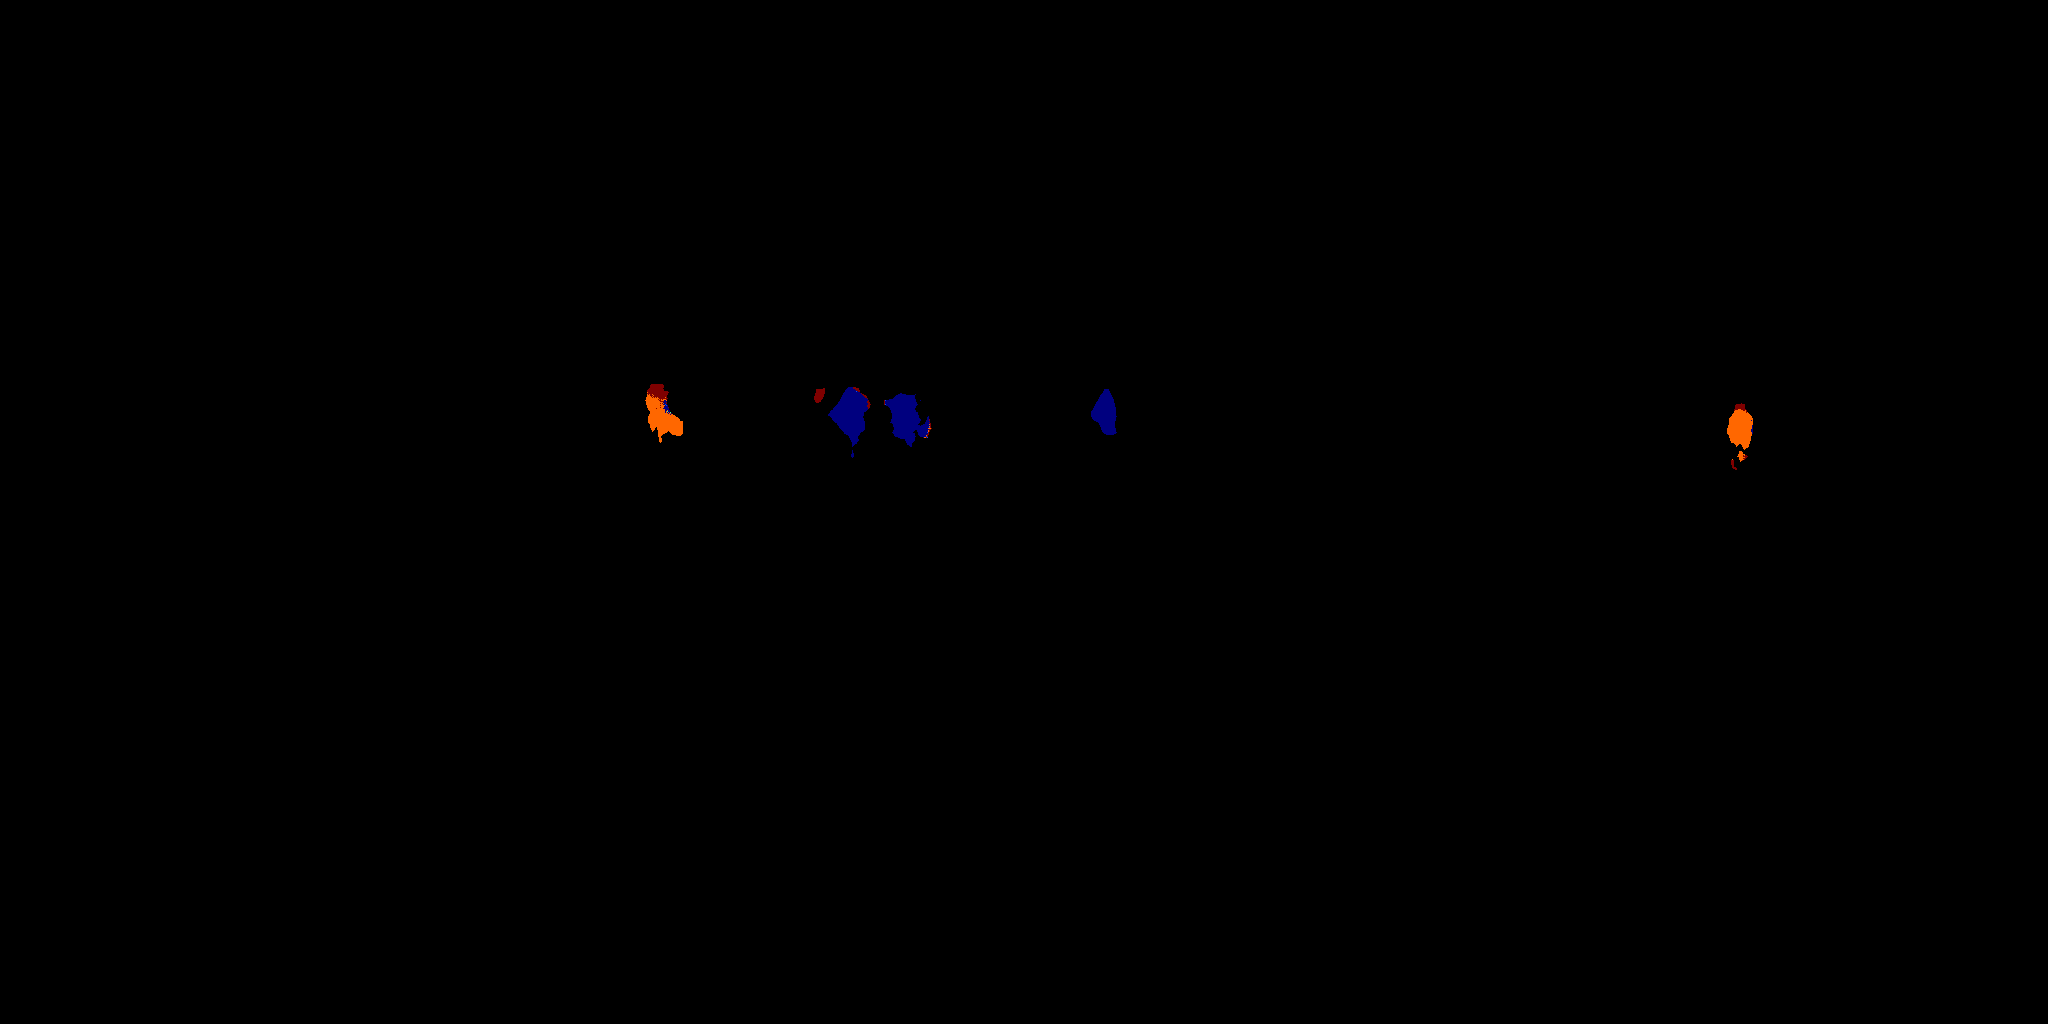

frankfurt_000001_010156
ground truth, predictions


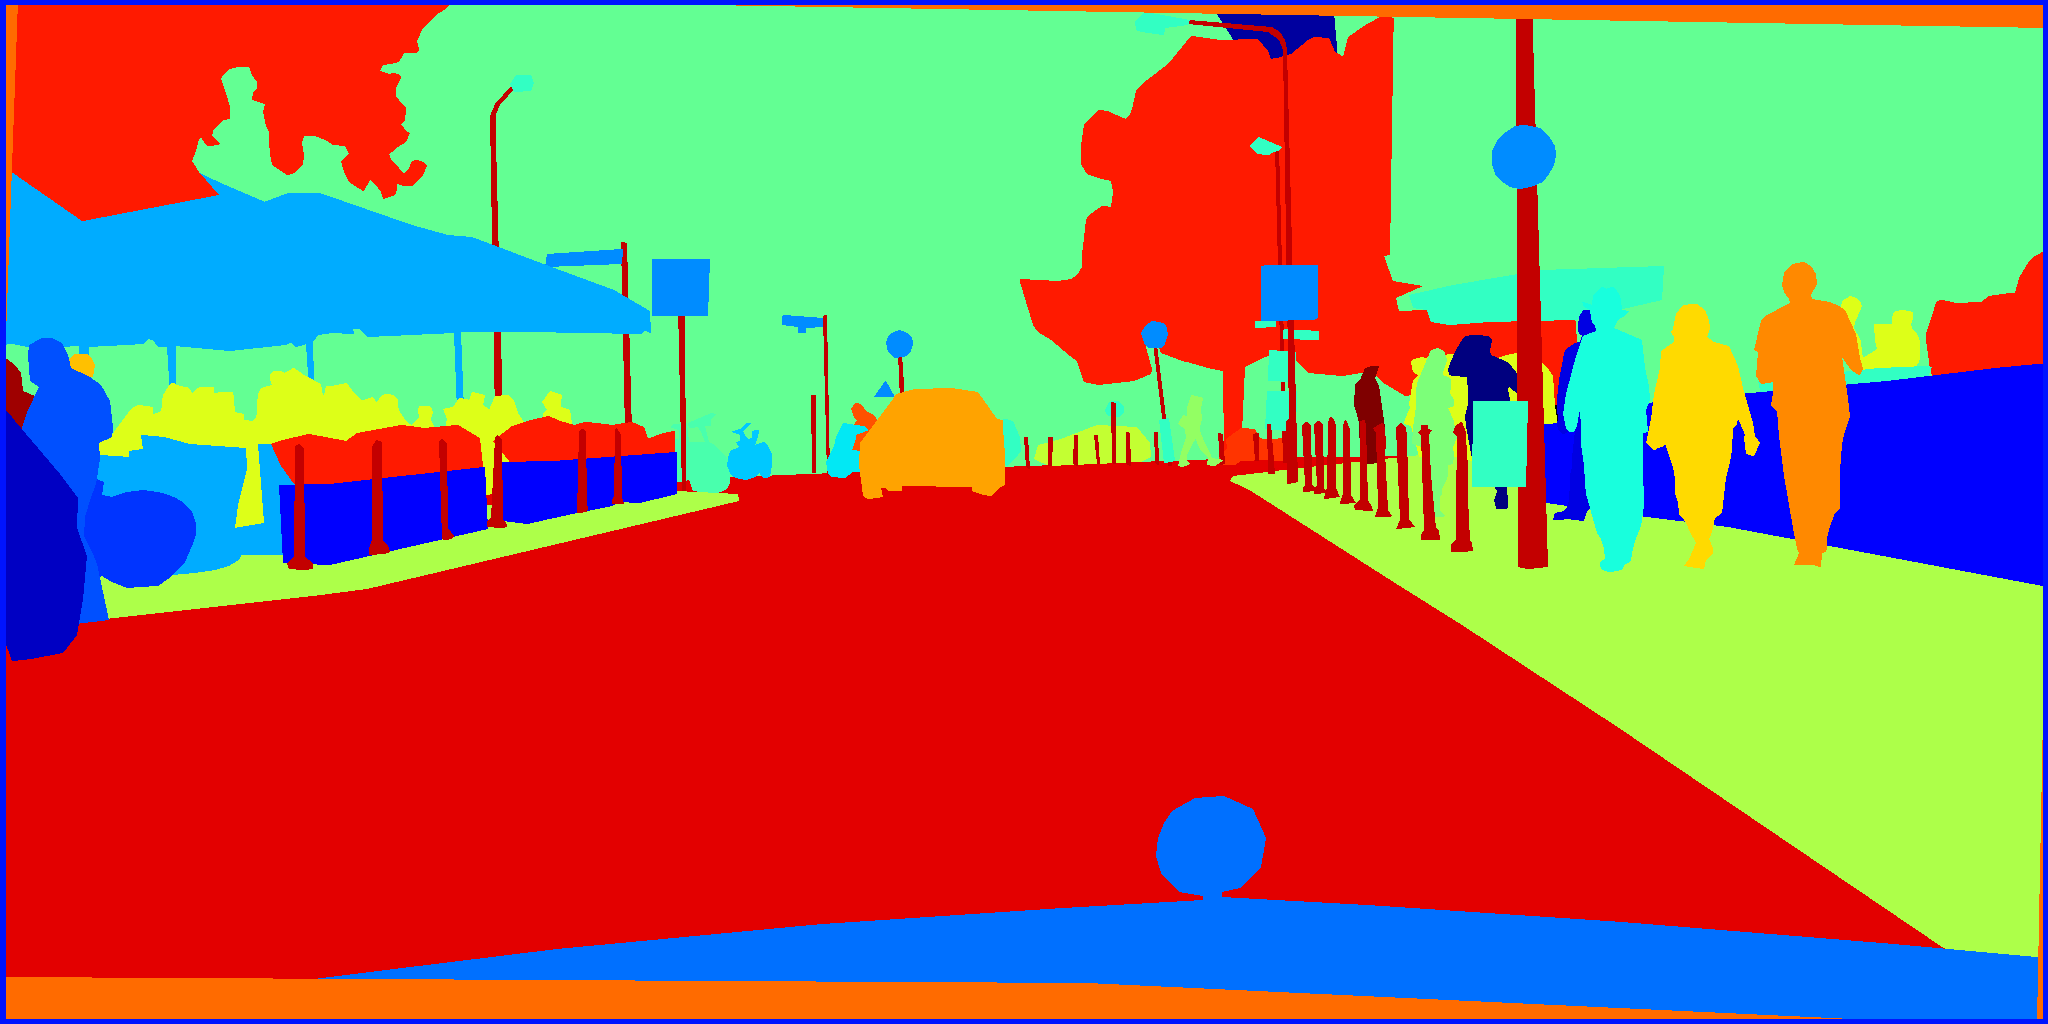

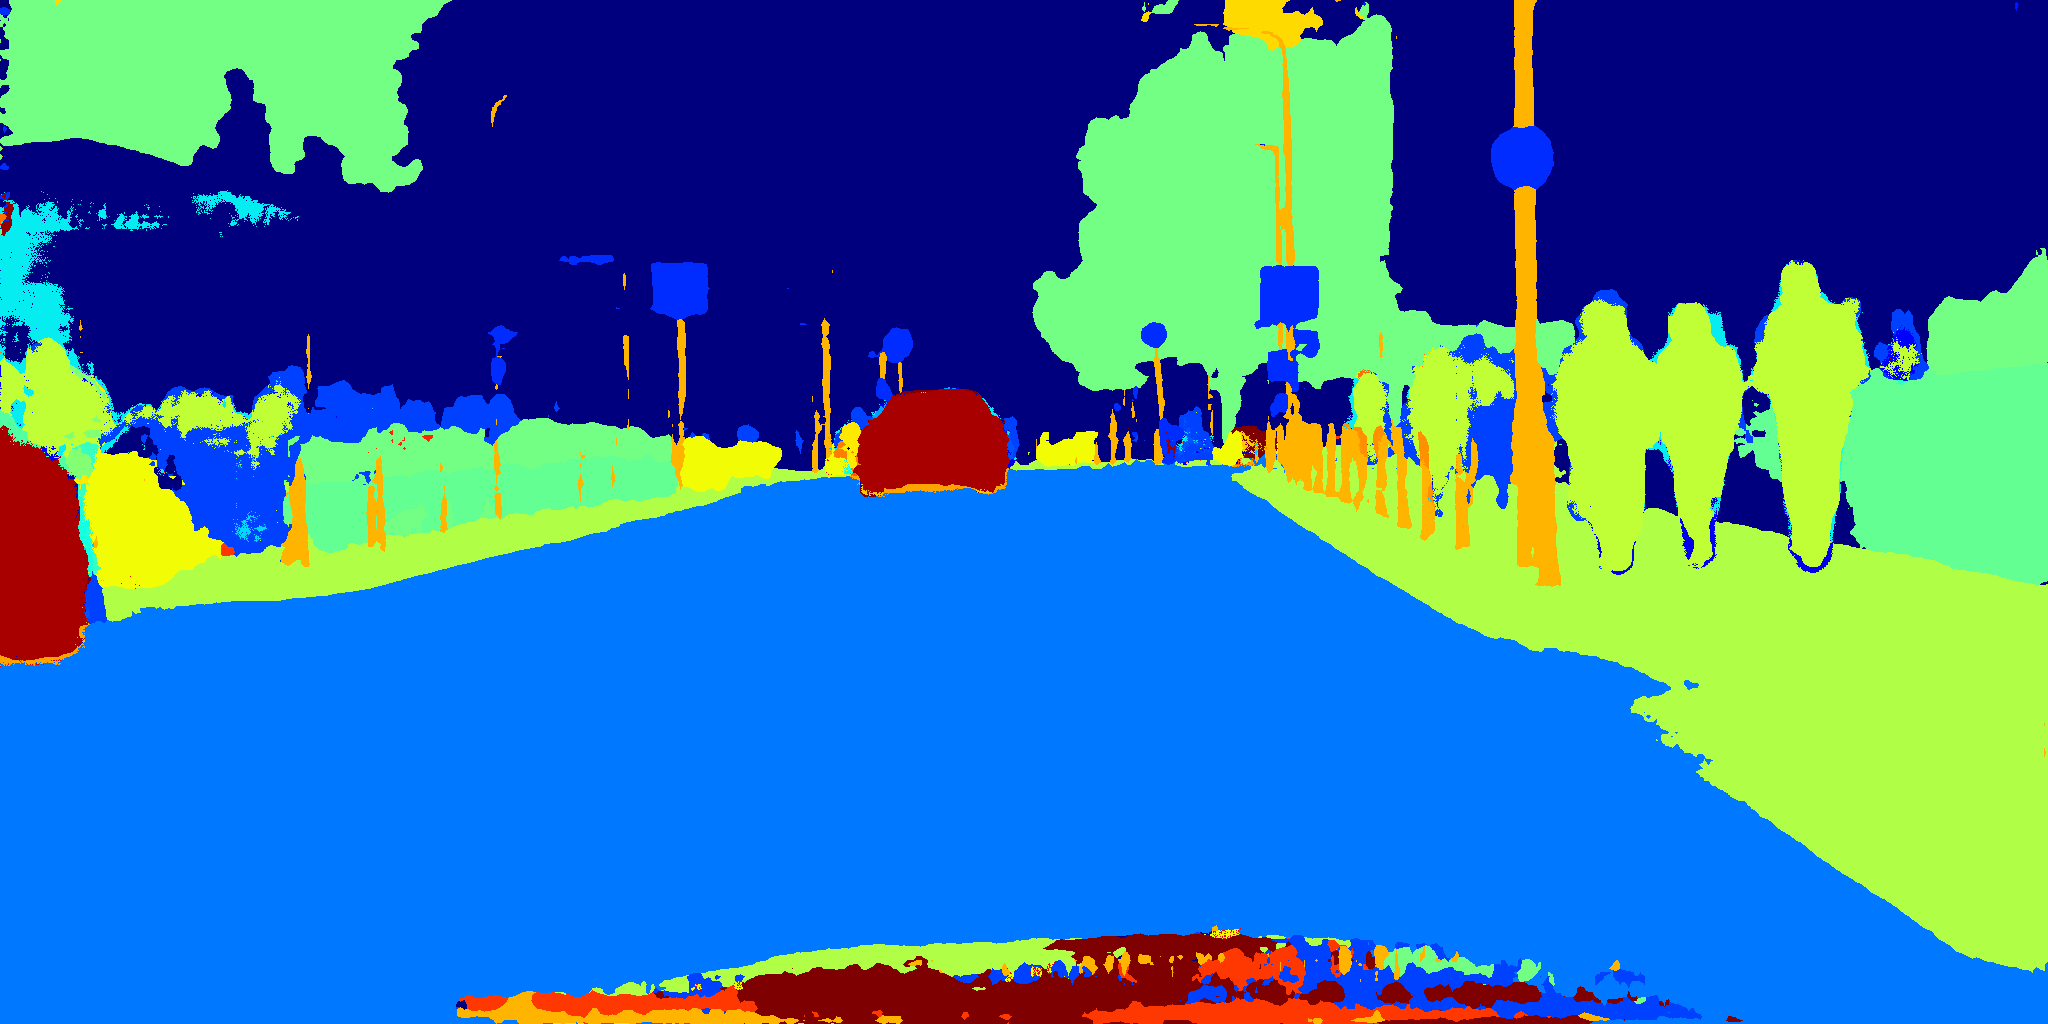

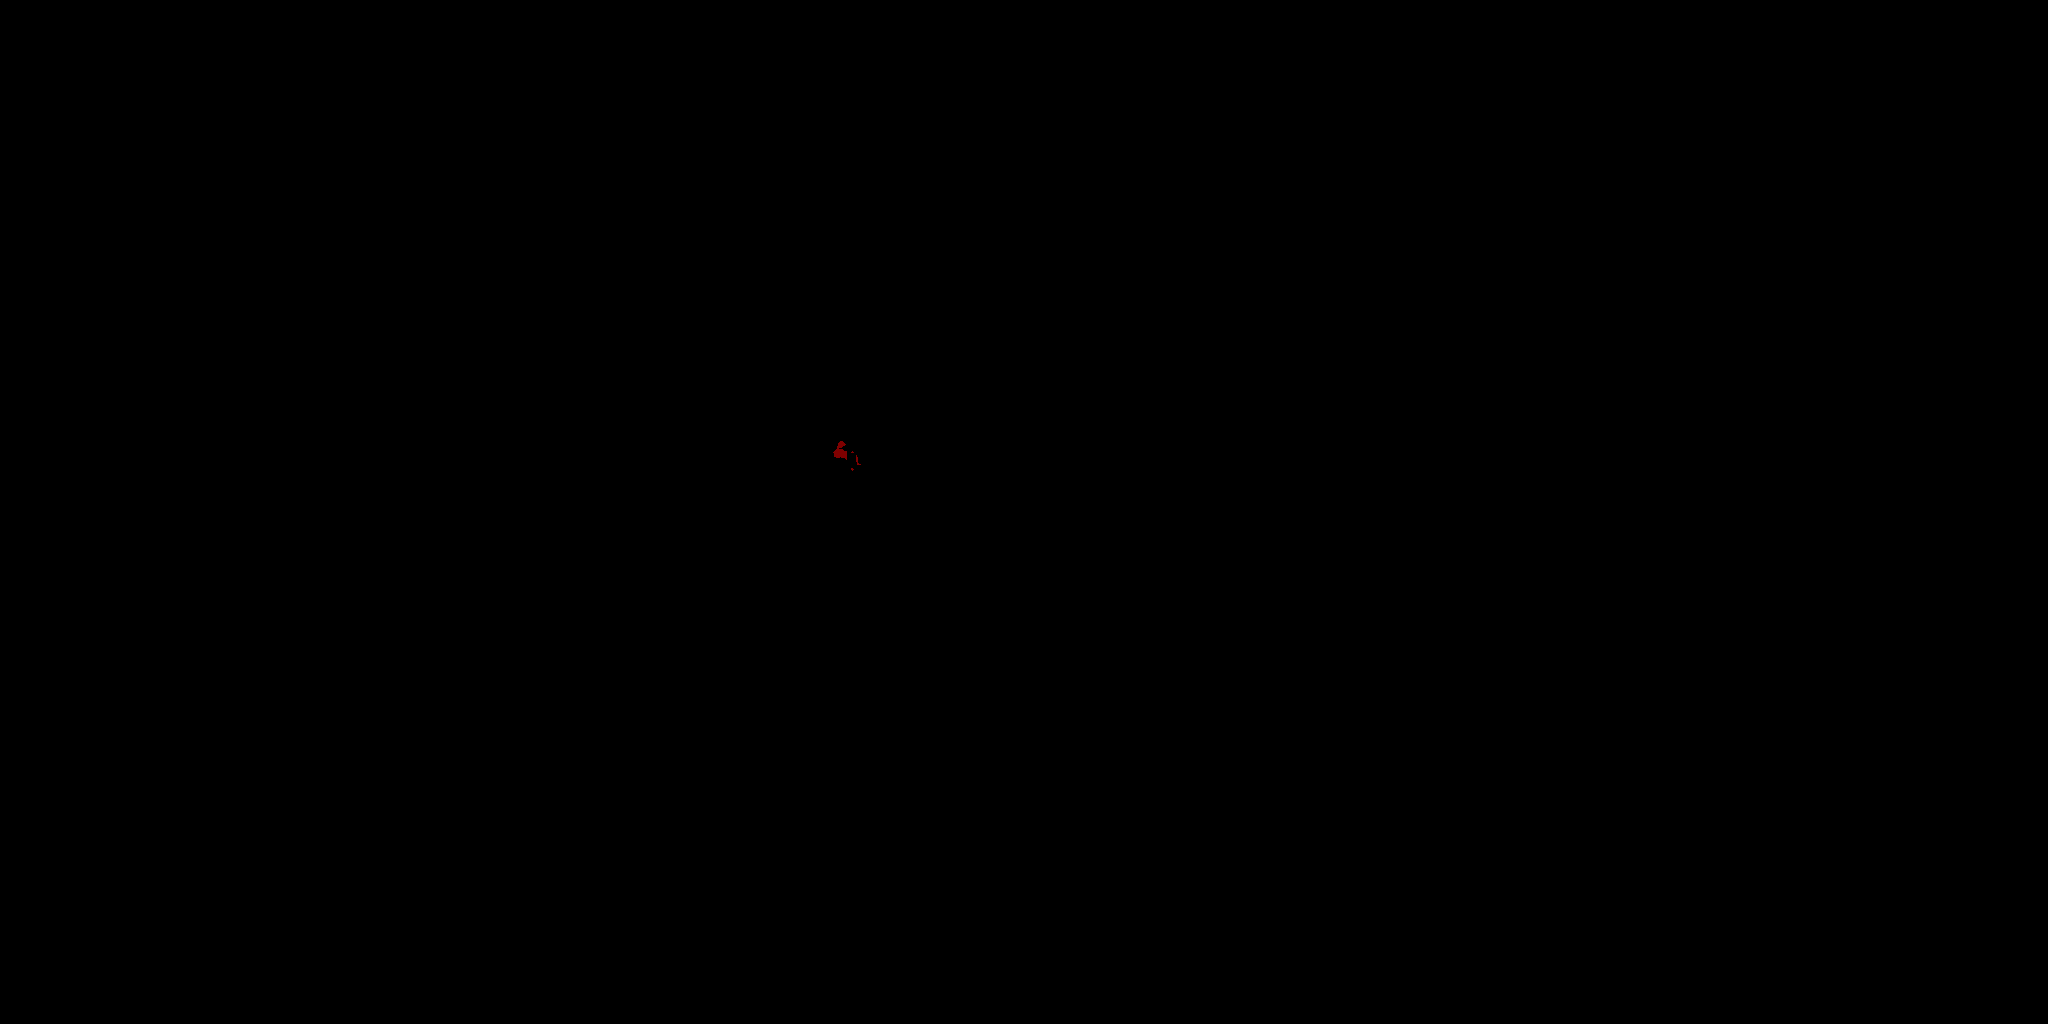

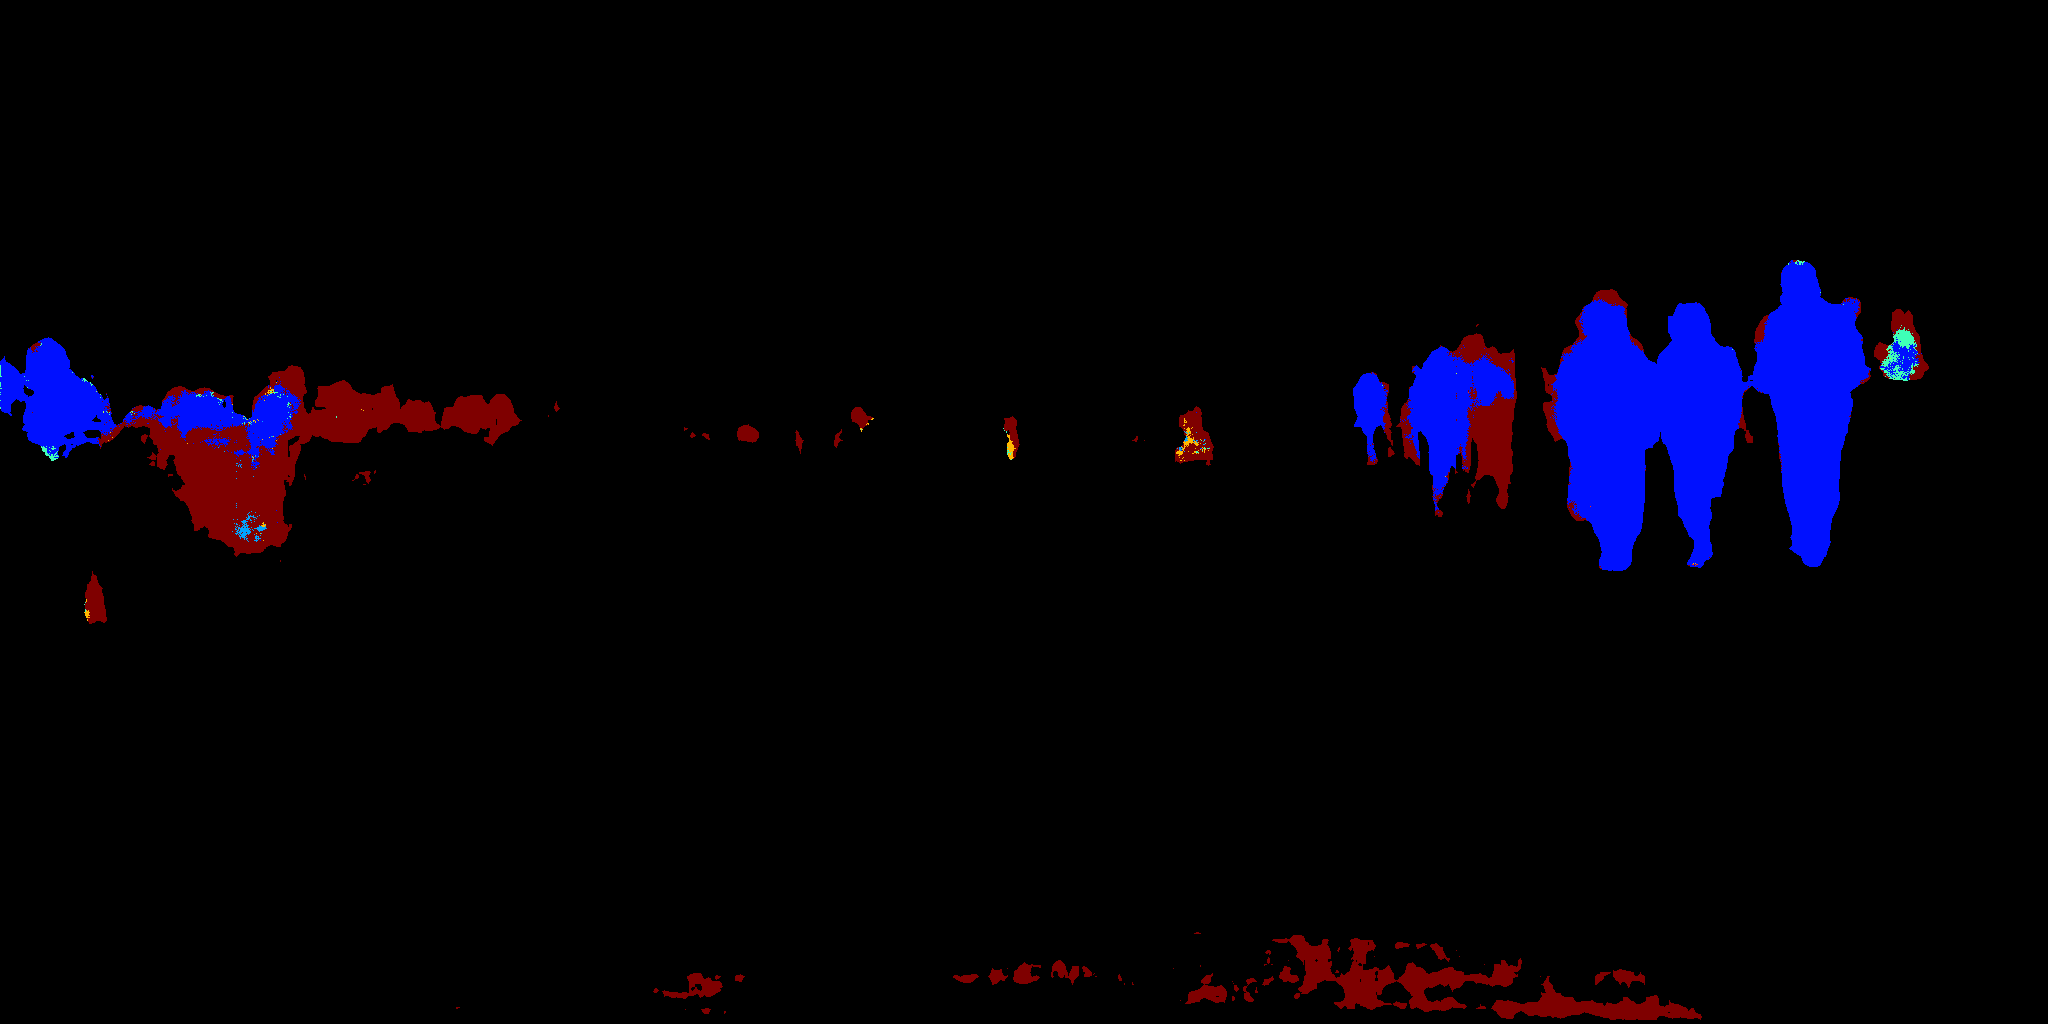

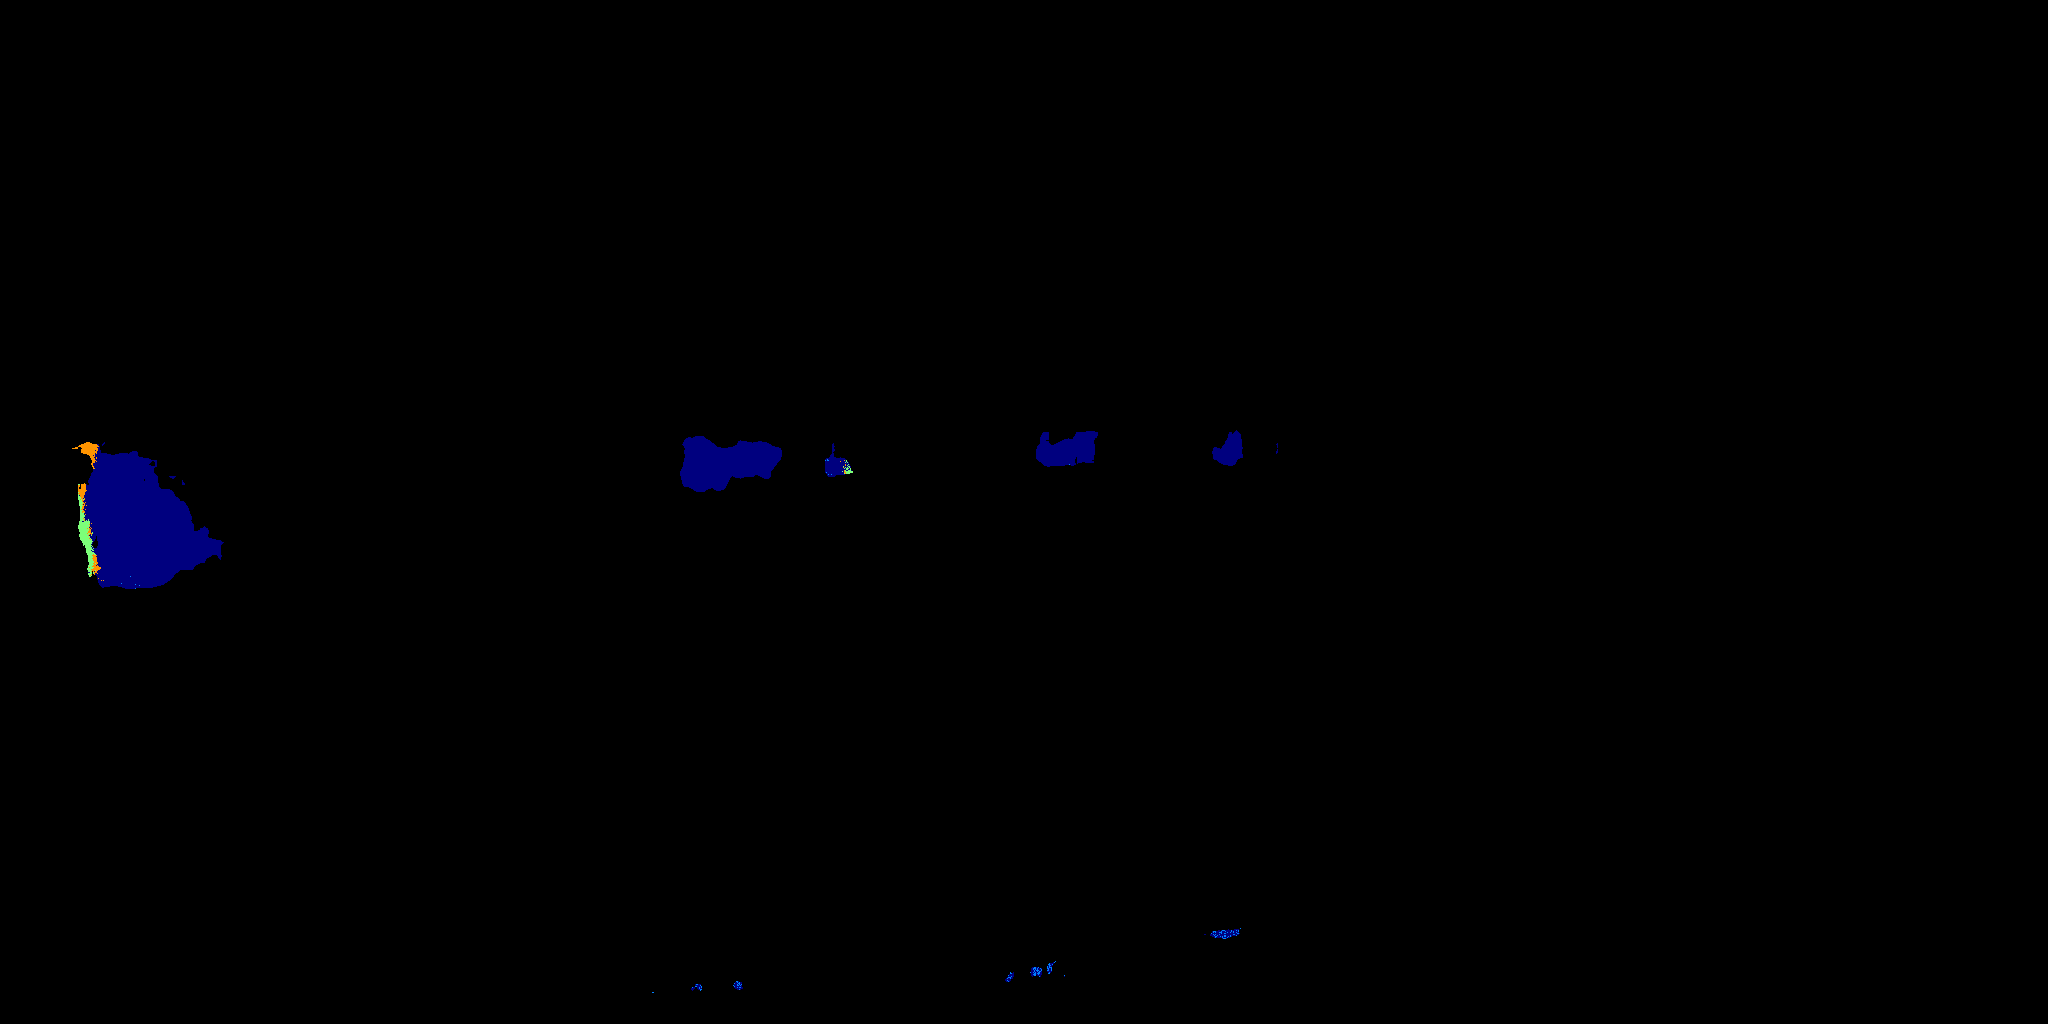

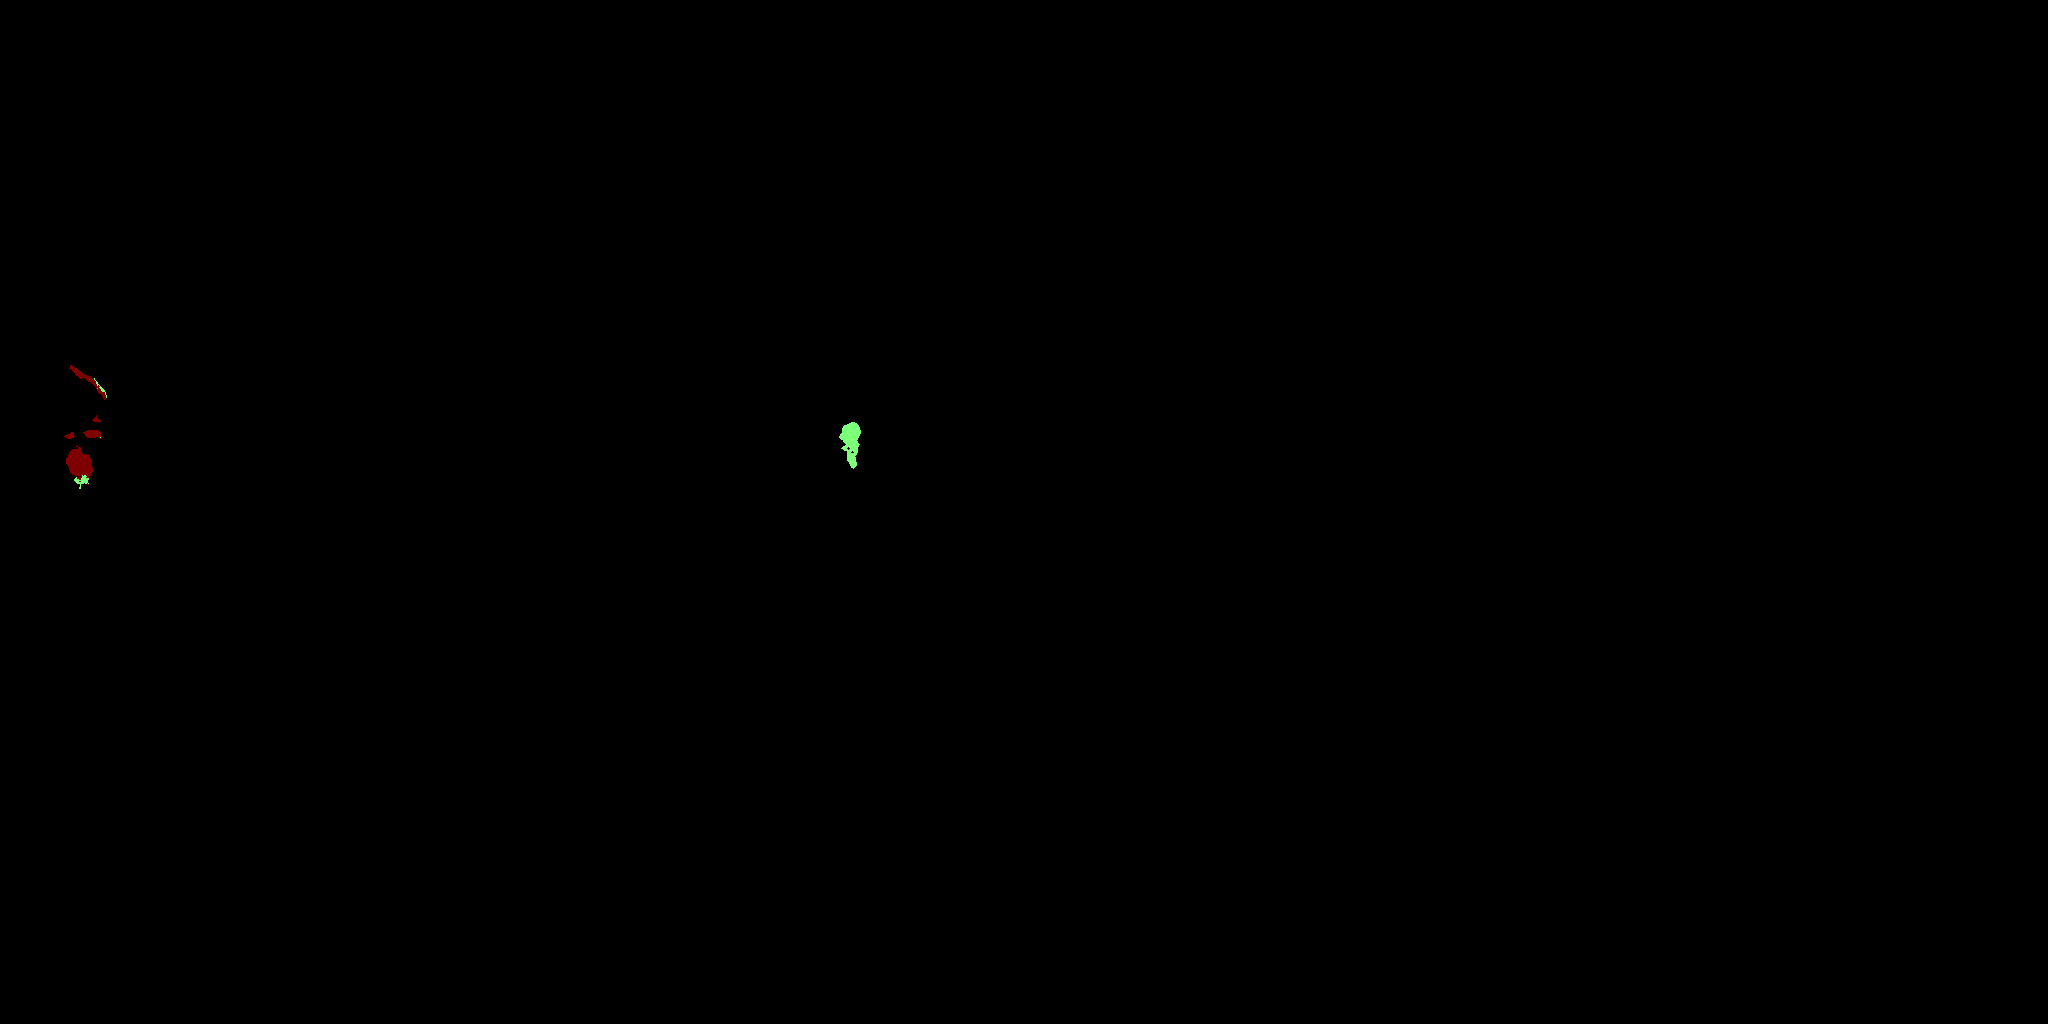

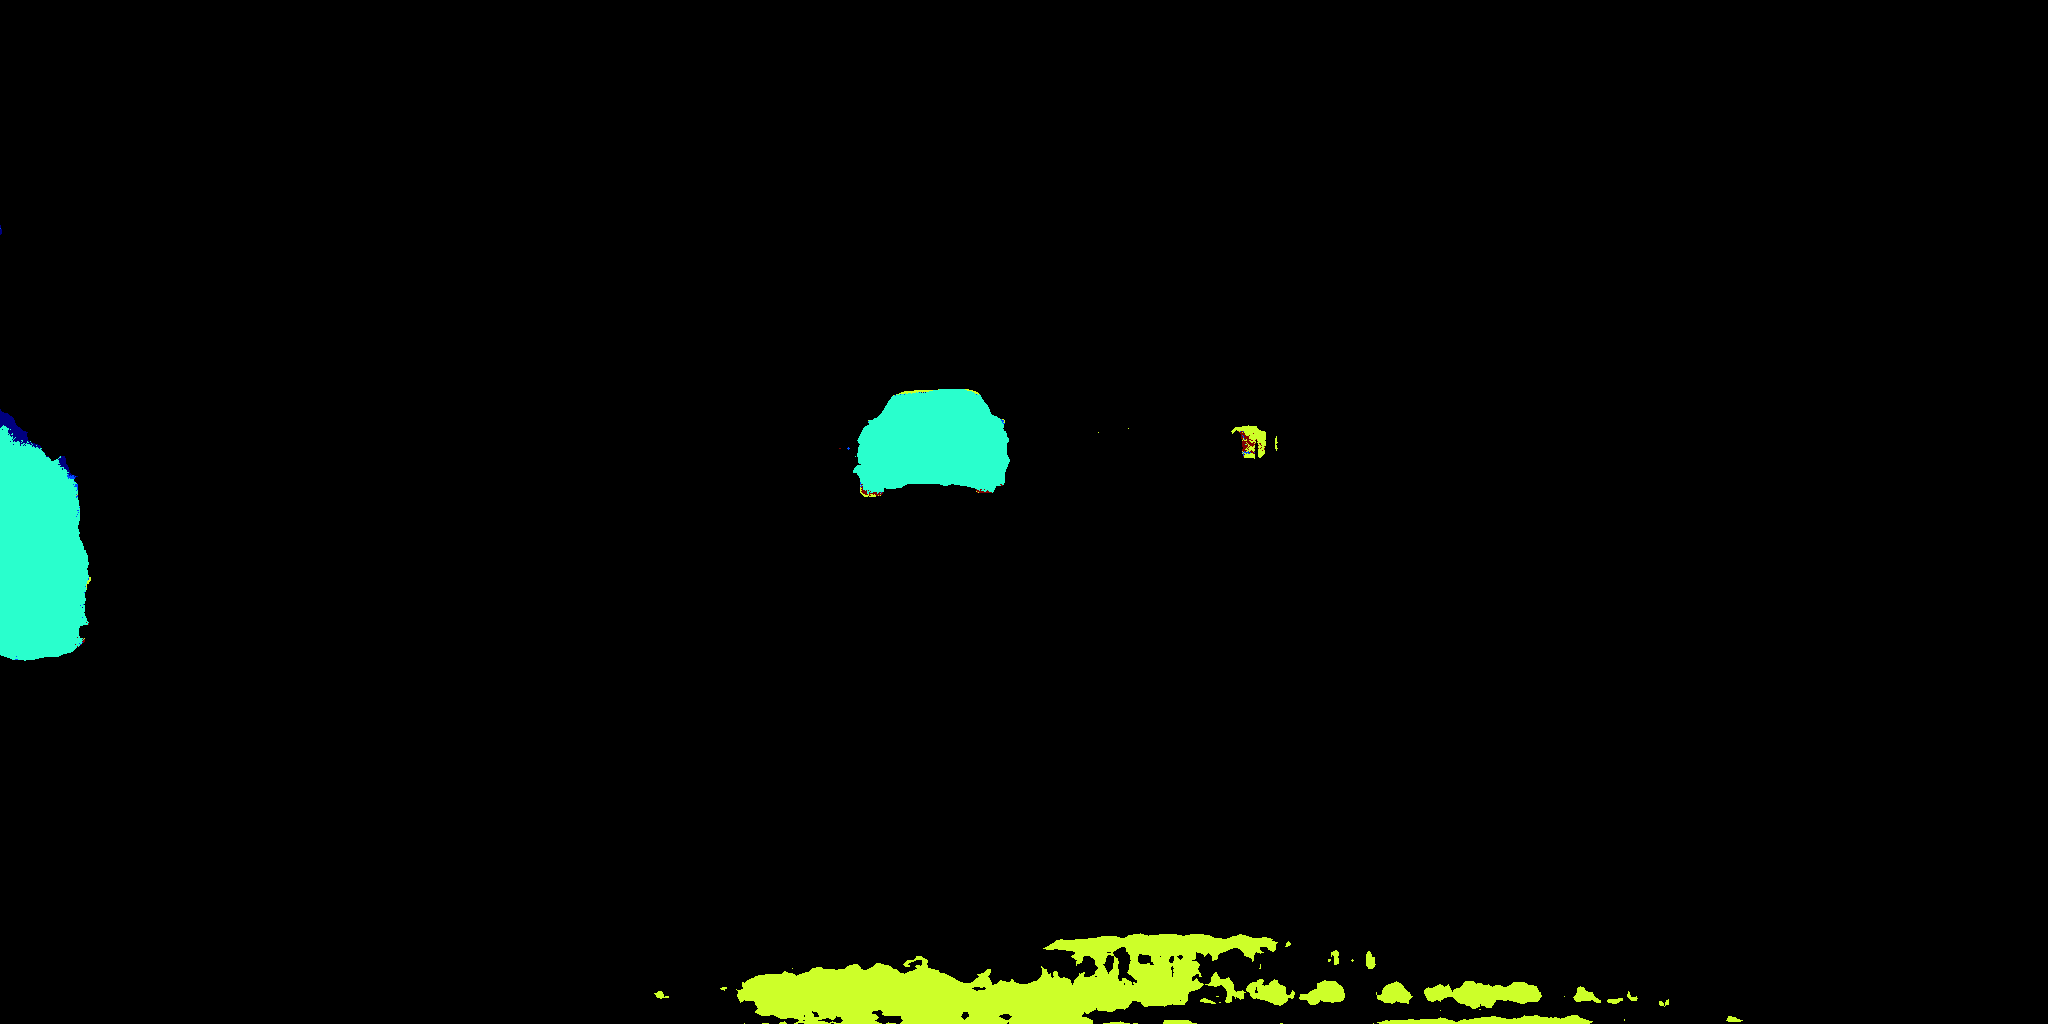

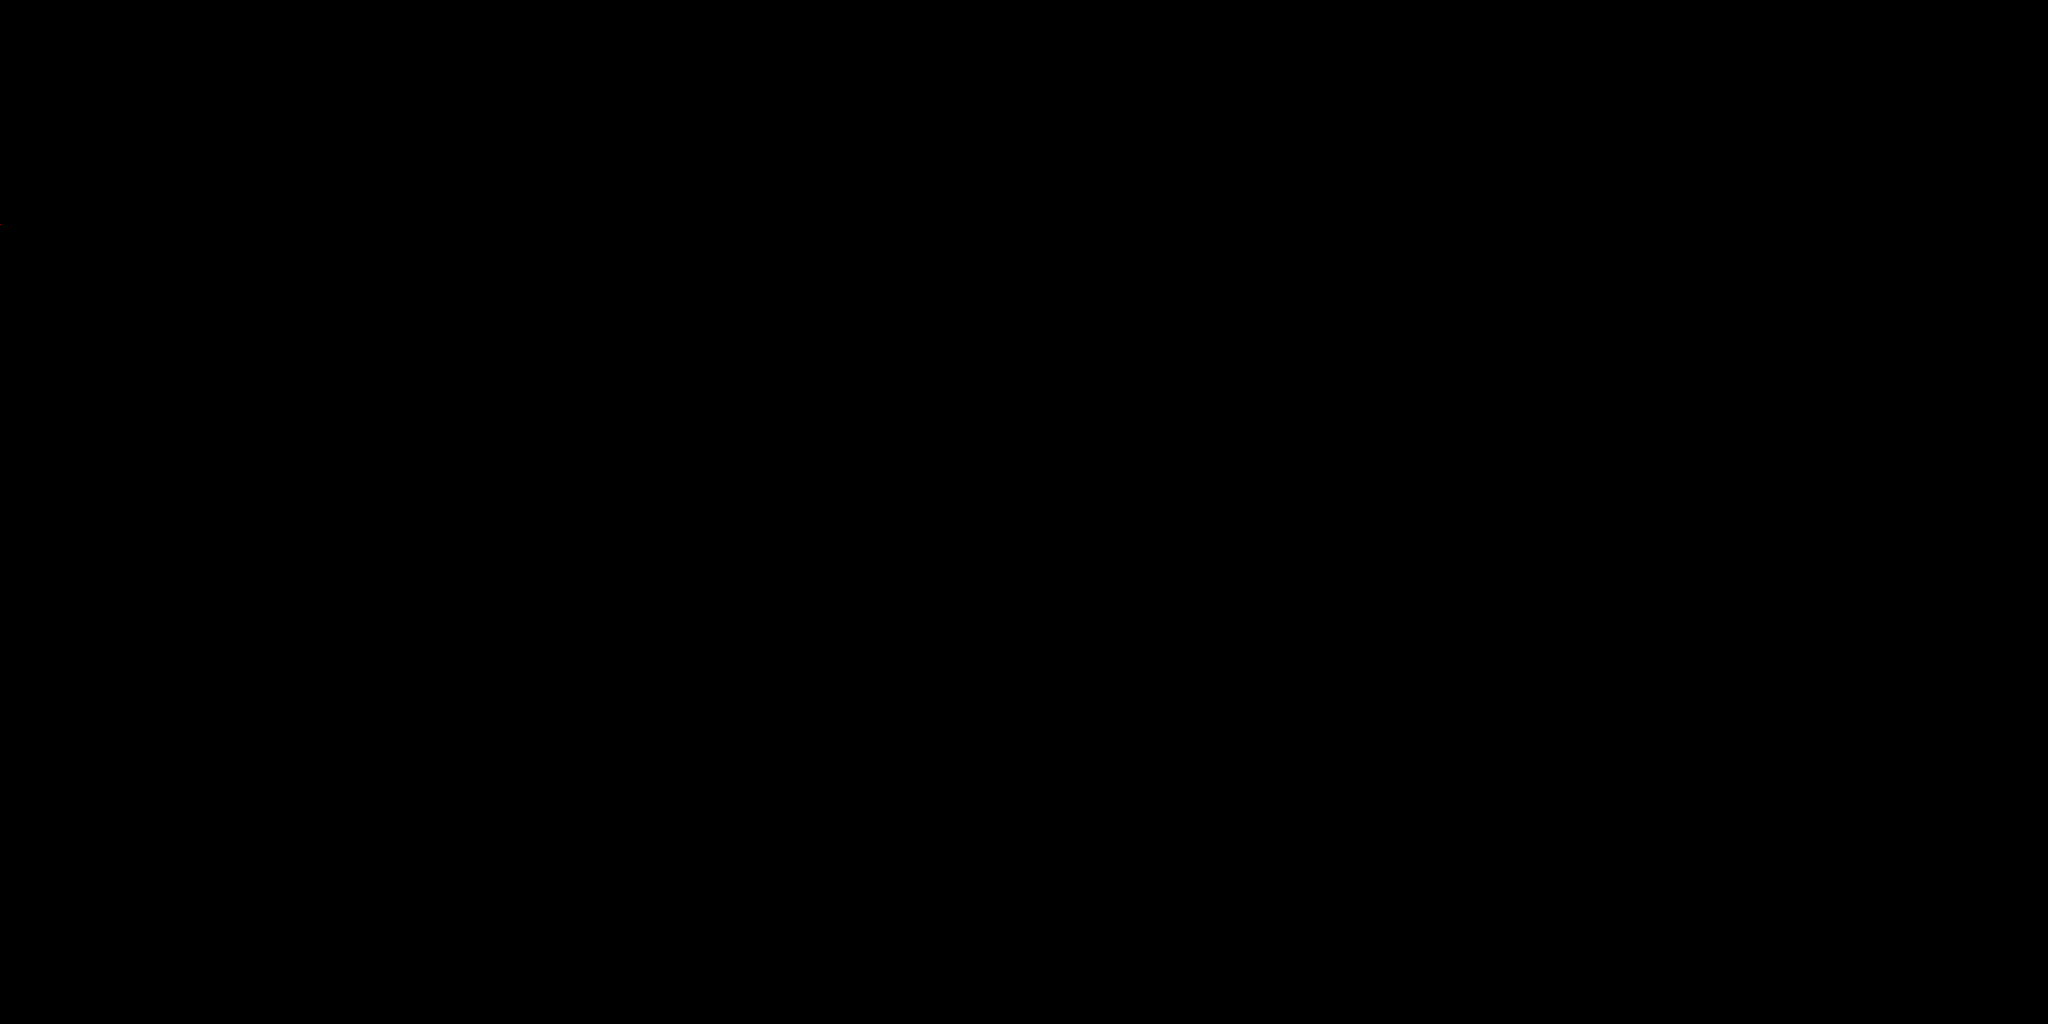

In [21]:
# Gather all image paths
full_color_path_list = glob.glob(os.path.join(results_dir, '*{}'.format(IMG_END)))
print('Found {} predictions'.format(len(full_color_path_list)))

for full_color_path in full_color_path_list[0:min(len(full_color_path_list), max_images)]:
    basename = os.path.basename(full_color_path)
    city = basename.split('_')[0]
    print(basename.rstrip(IMG_END))
    gt_path = os.path.join(gt_dir, city, basename.rstrip(IMG_END) + '_gtFine_instanceIds.png')
    gt_image = imageio.imread(gt_path)
    gt_image = get_color_img(gt_image)
    print('ground truth, predictions')
    display(get_img_from_array(gt_image, width=WIDTH), Image(full_color_path, width=WIDTH))
    
    # Display individual semantic classes
    for semantic_path in glob.glob(full_color_path.rstrip(IMG_END) + '_semantic_*'):
         display(Image(semantic_path, width=WIDTH))